# Clustering


One of the primary objectives of the project is to utilize clustering techniques on our
dataset in order to identify the class for each row.

To begin with, we will read the data and exclude the class labels, as clustering is an 
unsupervised learning approach that does not rely on predefined classes.

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
df = pd.read_csv('dummy_data_p326_2.csv')
print(df.head())

   age  gender  time_spent   platform  interests        location demographics  \
0   56    male           3  Instagram     Sports  United Kingdom        Urban   
1   46  female           2   Facebook     Travel  United Kingdom        Urban   
2   32    male           8  Instagram     Sports       Australia    Sub_Urban   
3   25    male           1  Instagram  Lifestlye       Australia        Urban   
4   38    male           3   Facebook     Travel   United States        Urban   

          profession  income  indebt  isHomeOwner  Owns_Car  
0  Software Engineer   19774    True        False     False  
1            Student   10564    True         True      True  
2   Marketer Manager   13258   False        False     False  
3  Software Engineer   14566   False         True      True  
4   Marketer Manager   19179    True         True      True  


In [16]:
features=df.drop('interests',axis=1)


In [3]:
# Define categorical and numerical columns
categorical_cols = ['platform', 'location', 'demographics', 'profession']
numerical_cols = ['age', 'time_spent', 'income', 'indebt', 'isHomeOwner', 'Owns_Car']

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
scaler = StandardScaler()
scaled_features = preprocessor.fit_transform(df)

# Create a new DataFrame with the scaled features 
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
df_scaled  = pd.DataFrame(scaled_features, columns=numerical_cols + list(encoded_cols))

# Display the scaled DataFrame
print("\nScaled DataFrame: ")
print(df.head())


Scaled DataFrame: 
   age  gender  time_spent   platform  interests        location demographics  \
0   56    male           3  Instagram     Sports  United Kingdom        Urban   
1   46  female           2   Facebook     Travel  United Kingdom        Urban   
2   32    male           8  Instagram     Sports       Australia    Sub_Urban   
3   25    male           1  Instagram  Lifestlye       Australia        Urban   
4   38    male           3   Facebook     Travel   United States        Urban   

          profession  income  indebt  isHomeOwner  Owns_Car  
0  Software Engineer   19774    True        False     False  
1            Student   10564    True         True      True  
2   Marketer Manager   13258   False        False     False  
3  Software Engineer   14566   False         True      True  
4   Marketer Manager   19179    True         True      True  


 k-means clustering with k=3, k=5, and k=8.

k=3: General segmentation.

k=5: More specific segmentation.

k=8: Detailed segmentation.

These values balance simplicity and detail, providing insights into user engagement based on average time spent.

In [4]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# set a seed for a random number generation 
np.random.seed(8953)

# determining K values  
k_values = [3 , 5, 8]

cluster_centers = {}
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled )
    
    cluster_centers[k] = kmeans_result.cluster_centers_
    cluster_labels[k] = kmeans_result.labels_

    print(f"Cluster Centers (K={k}):")
    print(cluster_centers[k])
    print("\nCluster Labels:")
    print(cluster_labels[k])
    print()

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Cluster Centers (K=3):
[[ 0.00181514  0.01958306 -0.02467421  0.04053686  0.07335344 -1.13131051
   0.31399317  0.39931741  0.28668942  0.32423208  0.32423208  0.35153584
   0.32081911  0.3447099   0.33447099  0.35153584  0.34812287  0.3003413 ]
 [-0.06478694  0.08891659  0.06937326  1.00299851  0.04880093  0.88393062
   0.26519337  0.40331492  0.33149171  0.32596685  0.40331492  0.27071823
   0.38674033  0.27624309  0.33701657  0.34254144  0.34254144  0.31491713]
 [ 0.05770412 -0.11253473 -0.02745884 -0.99701046 -0.15631716  0.88393062
   0.29896907  0.37628866  0.32474227  0.37628866  0.31958763  0.30412371
   0.3814433   0.30927835  0.30927835  0.32474227  0.34536082  0.32989691]]

Cluster Labels:
[0 1 0 2 1 1 1 0 0 0 0 2 0 0 2 1 1 0 0 1 2 1 2 1 0 0 0 0 0 0 2 2 1 0 0 1 0
 2 0 0 0 2 0 2 0 2 0 2 2 1 0 0 2 0 2 0 2 0 1 1 2 0 0 2 0 1 1 1 1 2 2 1 1 0
 0 0 2 2 1 0 1 2 0 0 0 2 0 1 1 0 2 0 2 2 1 1 2 1 0 2 0 0 2 0 0 1 2 0 2 1 1
 2 2 2 0 1 0 1 0 2 2 2 0 1 2 2 2 1 0 0 0 2 2 0 1 2 0 1 1 1 2 0 1 

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=5):
[[-1.94139062e-02  7.02984694e-02 -7.81214876e-02 -9.97010457e-01
   1.65340774e-01 -1.13131051e+00  3.04964539e-01  3.90070922e-01
   3.04964539e-01  3.54609929e-01  2.69503546e-01  3.75886525e-01
   3.19148936e-01  3.12056738e-01  3.68794326e-01  3.33333333e-01
   3.33333333e-01  3.33333333e-01]
 [-2.05312209e-03  1.56987642e-01  9.49369101e-02  1.00299851e+00
   9.88094814e-01  8.83930616e-01  2.81250000e-01  3.22916667e-01
   3.95833333e-01  3.33333333e-01  4.16666667e-01  2.50000000e-01
   3.54166667e-01  3.33333333e-01  3.12500000e-01  3.64583333e-01
   3.33333333e-01  3.02083333e-01]
 [ 2.15078805e-02 -2.74621580e-02  2.49051661e-02  1.00299851e+00
  -1.19769068e-02 -1.13131051e+00  3.22368421e-01  4.07894737e-01
   2.69736842e-01  2.96052632e-01  3.75000000e-01  3.28947368e-01
   3.22368421e-01  3.75000000e-01  3.02631579e-01  3.68421053e-01
   3.61842105e-01  2.69736842e-01]
 [-4.84277775e-04 -3.00019143e-02 -1.15467783e-01 -9.97010457e-01
   9.88094814e

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=8):
[[-6.86883155e-01  5.15238492e-01 -5.86542955e-01 -8.12394245e-01
  -1.01204863e+00 -4.49228902e-01  4.00000000e-01  3.53846154e-01
   2.46153846e-01  5.38461538e-01  1.07692308e-01  3.53846154e-01
   4.15384615e-01  3.23076923e-01  2.61538462e-01  4.46153846e-01
   2.92307692e-01  2.61538462e-01]
 [ 4.04675596e-01 -2.54313310e-01 -8.66018905e-01  1.00299851e+00
   2.07551032e-01 -9.59277736e-01  3.17073171e-01  4.75609756e-01
   2.07317073e-01  2.80487805e-01  4.14634146e-01  3.04878049e-01
   3.17073171e-01  3.65853659e-01  3.17073171e-01  2.31707317e-01
   4.14634146e-01  3.53658537e-01]
 [-8.50487827e-03  1.34772518e-01 -6.11611745e-02 -9.97010457e-01
   9.88094814e-01 -1.13131051e+00  2.77108434e-01  4.81927711e-01
   2.40963855e-01  2.65060241e-01  3.49397590e-01  3.85542169e-01
   3.01204819e-01  3.37349398e-01  3.61445783e-01  3.13253012e-01
   3.61445783e-01  3.25301205e-01]
 [-1.35639260e-01  1.20363357e-02  4.05013677e-02  1.00299851e+00
  -1.01204863e

To assess and display the outcome from the previous calculation using the Silhouette coefficient.







### 1. Using silhouette coefficient to visulize the results

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' 

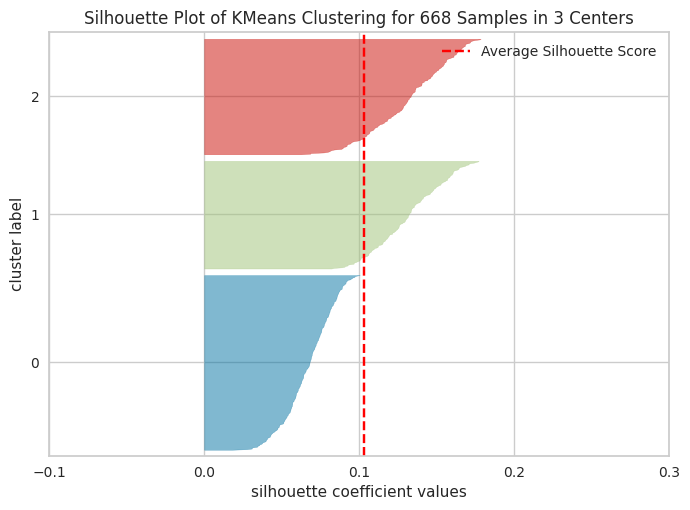

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


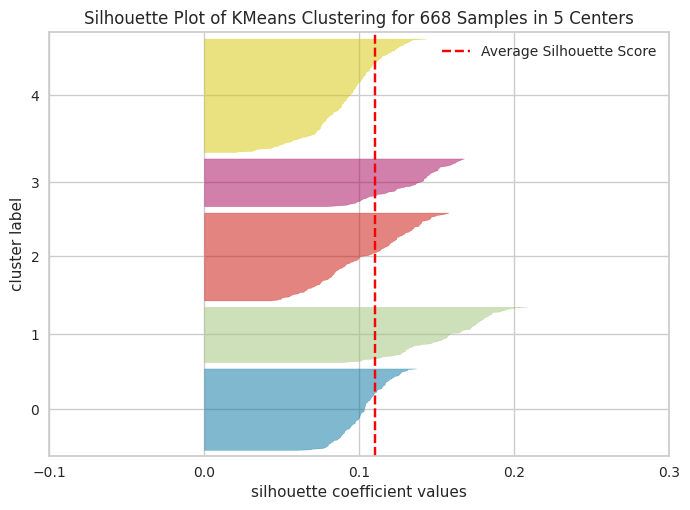

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


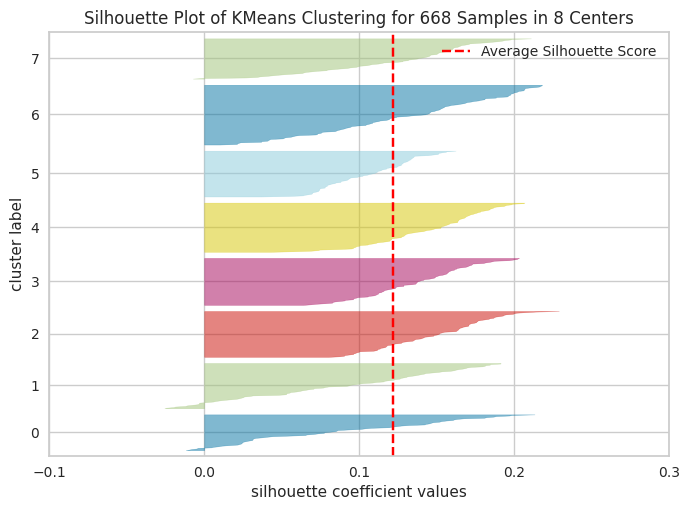

In [5]:
%pip install yellowbrick 
from yellowbrick.cluster import SilhouetteVisualizer


# determining  K values  
k_values = [3 , 5, 8]


cluster_centers = {}
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)
    
    # Create and fit SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

The dotted line representing the silhouette coefficient value assists us in determining the optimal number
of clusters. A higher silhouette coefficient value indicates a better fit for the number of clusters, K.
For instance: 
When K=3, the silhouette coefficient value is 0.11.

When K=5, it increases to 0.13, 

when K=8, it further improves to 0.14.

This suggests that the optimal choice is K=8.                                                                                                    
The second evaluation method used is Elbow method where the best number of cluster is the turning point in the curve.

1. *k=3:* This choice allows for a basic segmentation of users into three groups based on their average time spent. It provides a high-level overview of user engagement levels, which can be useful for general marketing strategies or product development.

2. *k=5:* Selecting k=5 provides a more detailed segmentation, allowing for finer distinctions between user groups. This can be beneficial for targeted marketing campaigns or personalized recommendations, as it identifies additional nuances in user behavior based on average time spent.

3. *k=8:* Choosing k=8 offers even greater granularity, enabling the identification of more specific user segments with distinct patterns of average time spent. This level of detail can be valuable for understanding complex user behaviors and tailoring strategies to different user segments.

By selecting these three values of k, we aim to balance simplicity and granularity in the clustering analysis. This approach allows for a range of insights, from high-level trends to detailed user segmentations, providing a comprehensive view of user engagement based on average time spent.

### 2. Using Elbow method to Visulize the results

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

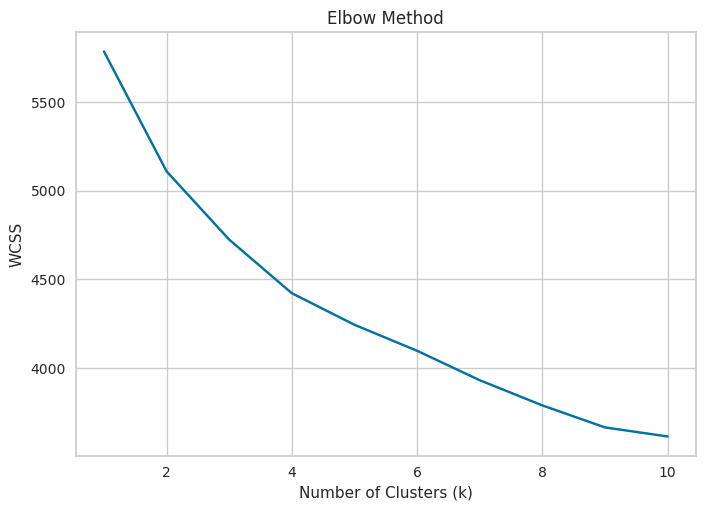

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Initialize an empty list to store WCSS values
wcss = []

# Define a range of k values
k_values = range(1, 11)

# Calculate WCSS for each k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=8953)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

Upon visually examining the graph illustrating the total within-cluster sum of squares (WSS) in relation to K,
it becomes apparent that the inflection point aligns with a cluster number of 2.
This suggests that the ideal number of clusters is 2.

# Classification

in classification When constructing a Decision Tree, the Gini Index and Entropy measures are used to determine which features to use for splitting the data at each node (point in the tree). The feature that results in the least reduction in Gini Index or Entropy is chosen, indicating that it splits the data better and achieves a more accurate classification.

   Three partition sizes:
   
   90% training, 10% testing

   80% training, 20% testing

   70% training, 30% testing

# Gini index

The Gini Index is a measure used to quantify the deviation or gap between different classes within a dataset. It ranges from 0 to 1, where a value of 0 indicates no deviation or variation between classes, while a value of 1 indicates a significant deviation and variation between classes
# Entropy.

Entropy, on the other hand, is a measure used to quantify the disorder or chaos within a dataset. It also ranges from 0 to 1, where a value of 0 indicates no chaos or lack of order, while a value of 1 indicates high chaos or lack of ordication.

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

### 90% training, 10% testing


Accuracy: 0.31343283582089554
[[ 7 11  8]
 [ 5  5 10]
 [ 8  4  9]]


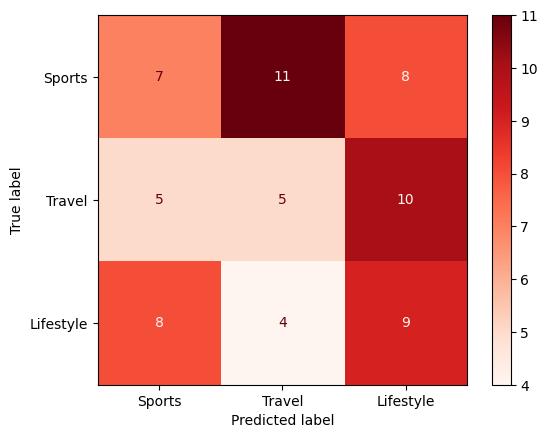

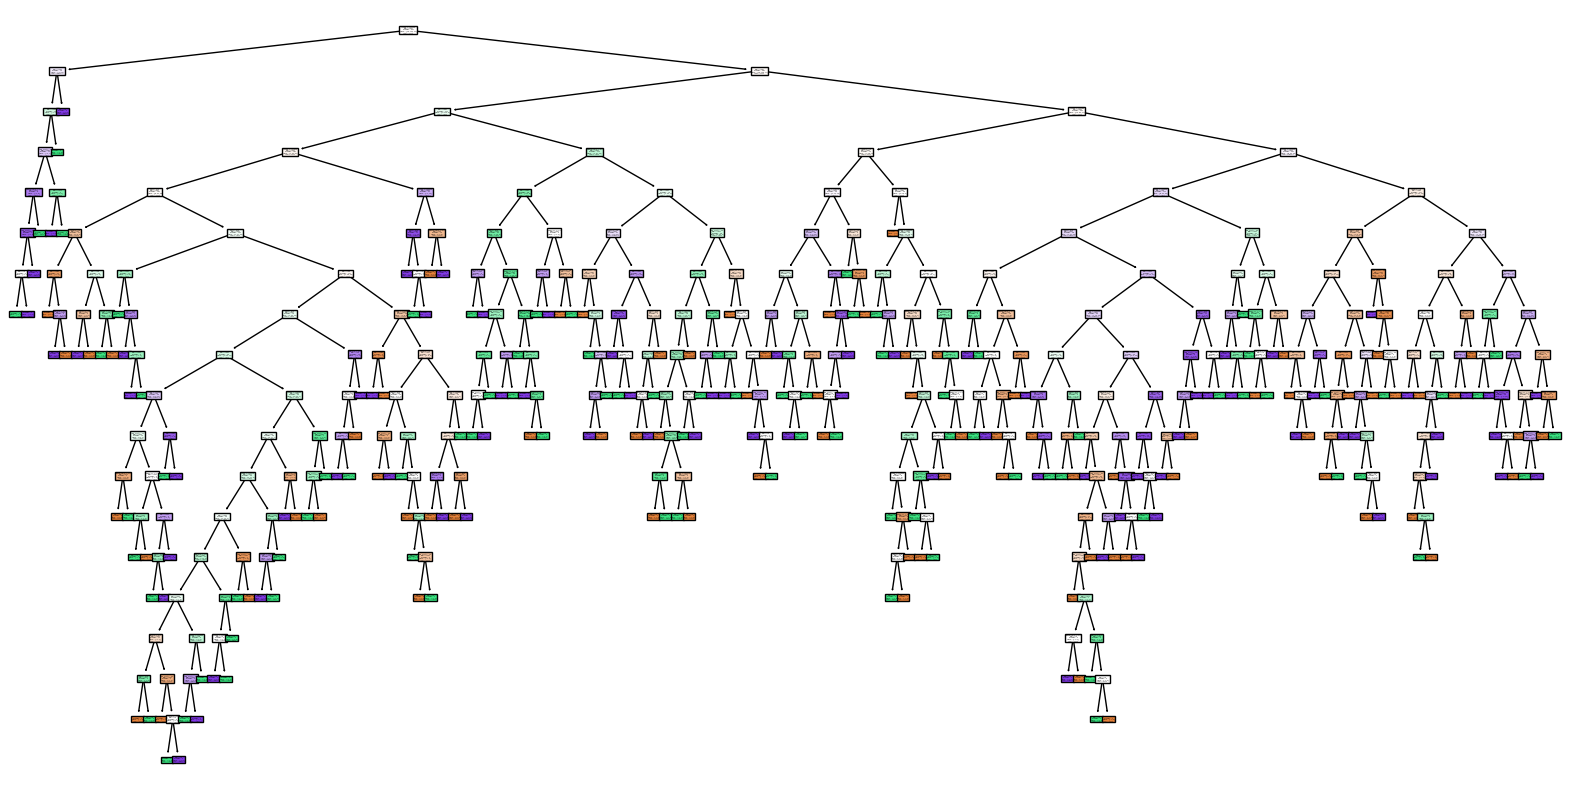

Accuracy (Entropy): 0.2835820895522388


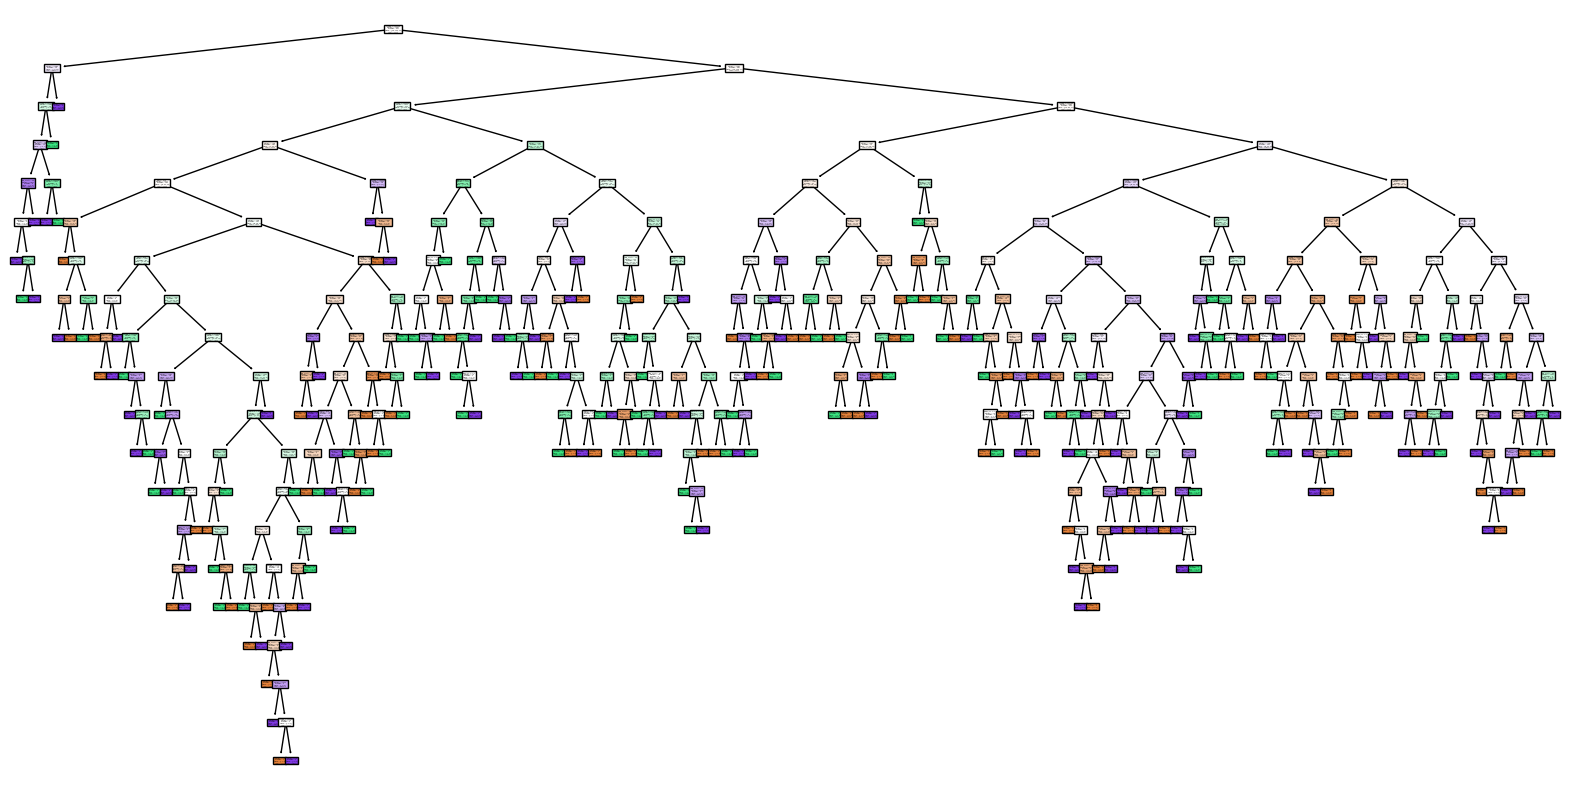

In [11]:
#convert categorical variables into numerical form
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == "object" else col)

#drop the class
X = df_encoded.drop(columns=["interests"])
y = df_encoded["interests"]

#Spilt the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

# To measure Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Compute confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sports','Travel','Lifestyle'])
disp.plot(cmap=plt.cm.Reds)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

#Spilt by entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(x_train, y_train)


y_pred_entropy = clf_entropy.predict(x_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)


plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

In [1]:
### 80% training, 20% testing

Accuracy: 0.3358208955223881
[[14 17 18]
 [12 18 14]
 [16 12 13]]


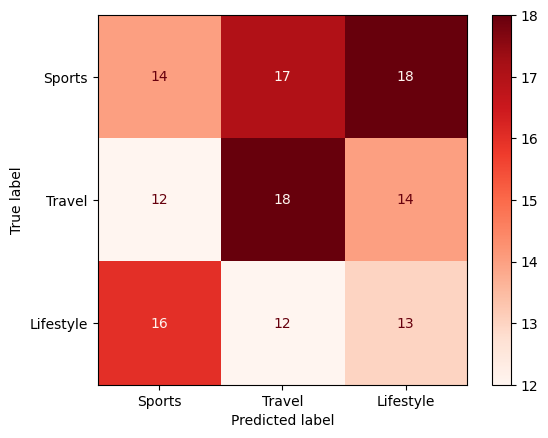

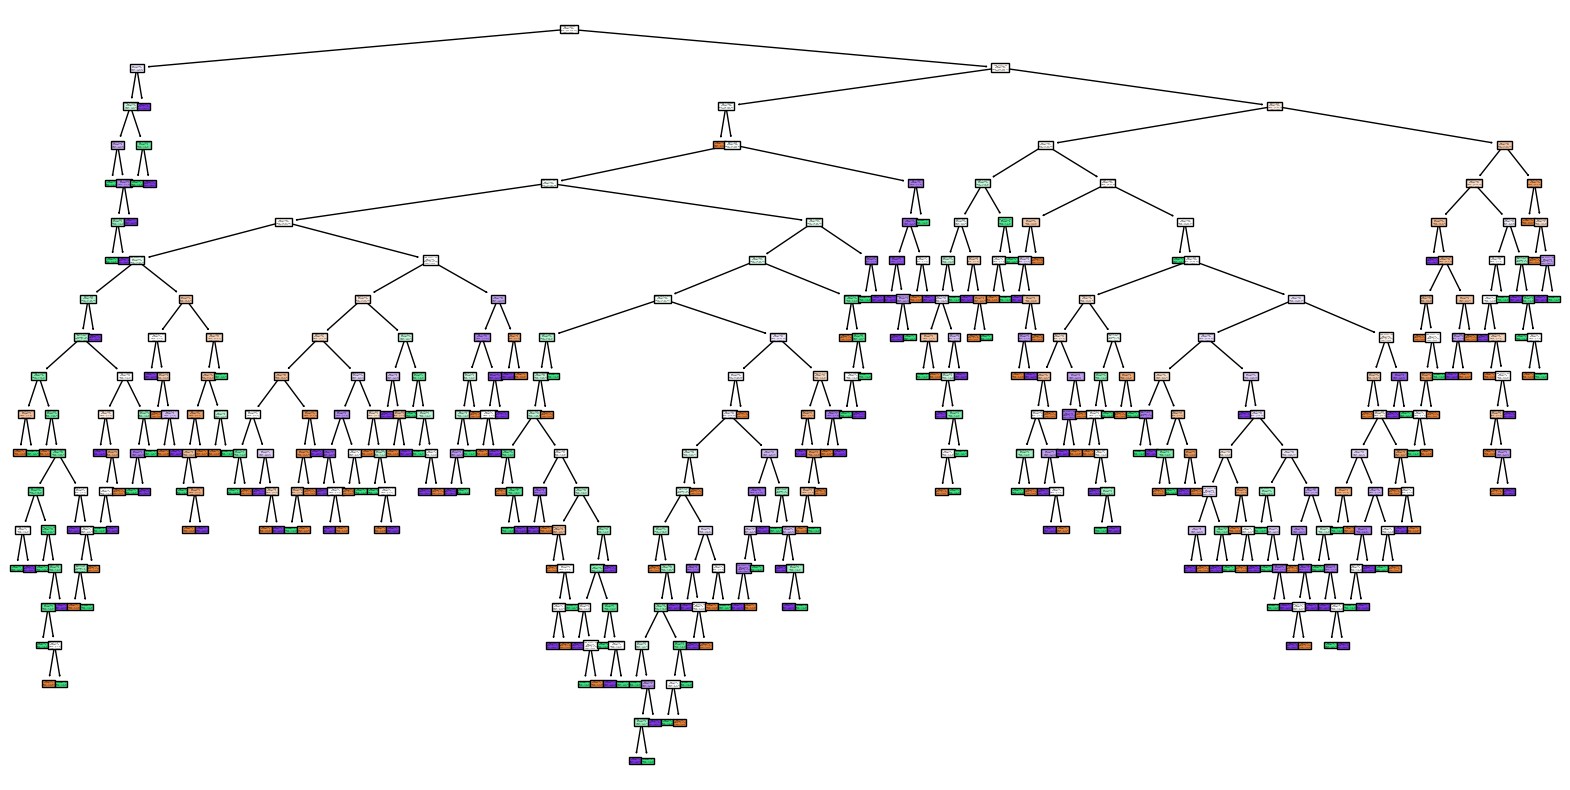

Accuracy (Entropy): 0.30597014925373134


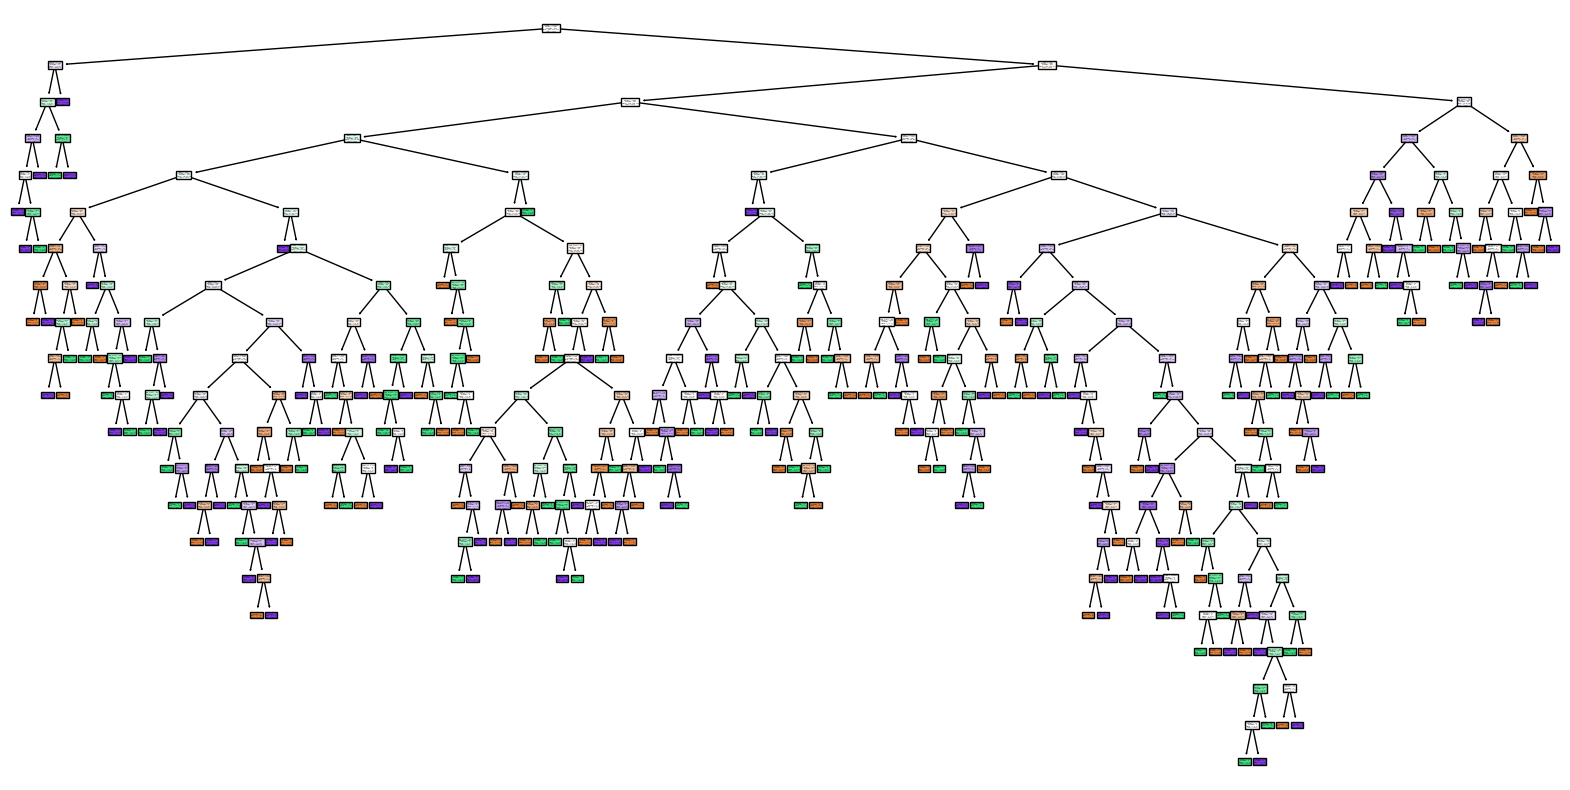

In [12]:
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == "object" else col)


X = df_encoded.drop(columns=["interests"])
y = df_encoded["interests"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sports','Travel','Lifestyle'])
disp.plot(cmap=plt.cm.Reds)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()


clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(x_train, y_train)


y_pred_entropy = clf_entropy.predict(x_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)


plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

In [ ]:
### 70% training, 30% testing


Accuracy: 0.29850746268656714
[[19 27 27]
 [21 19 20]
 [18 28 22]]


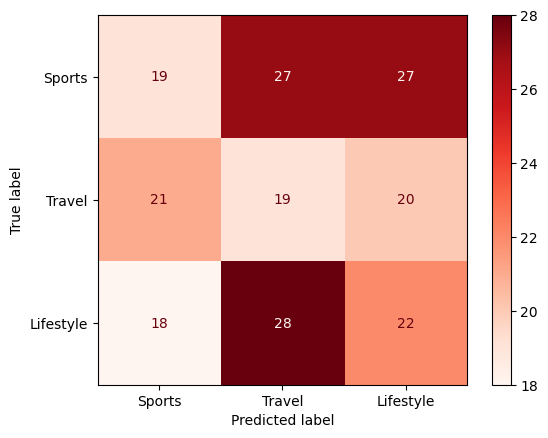

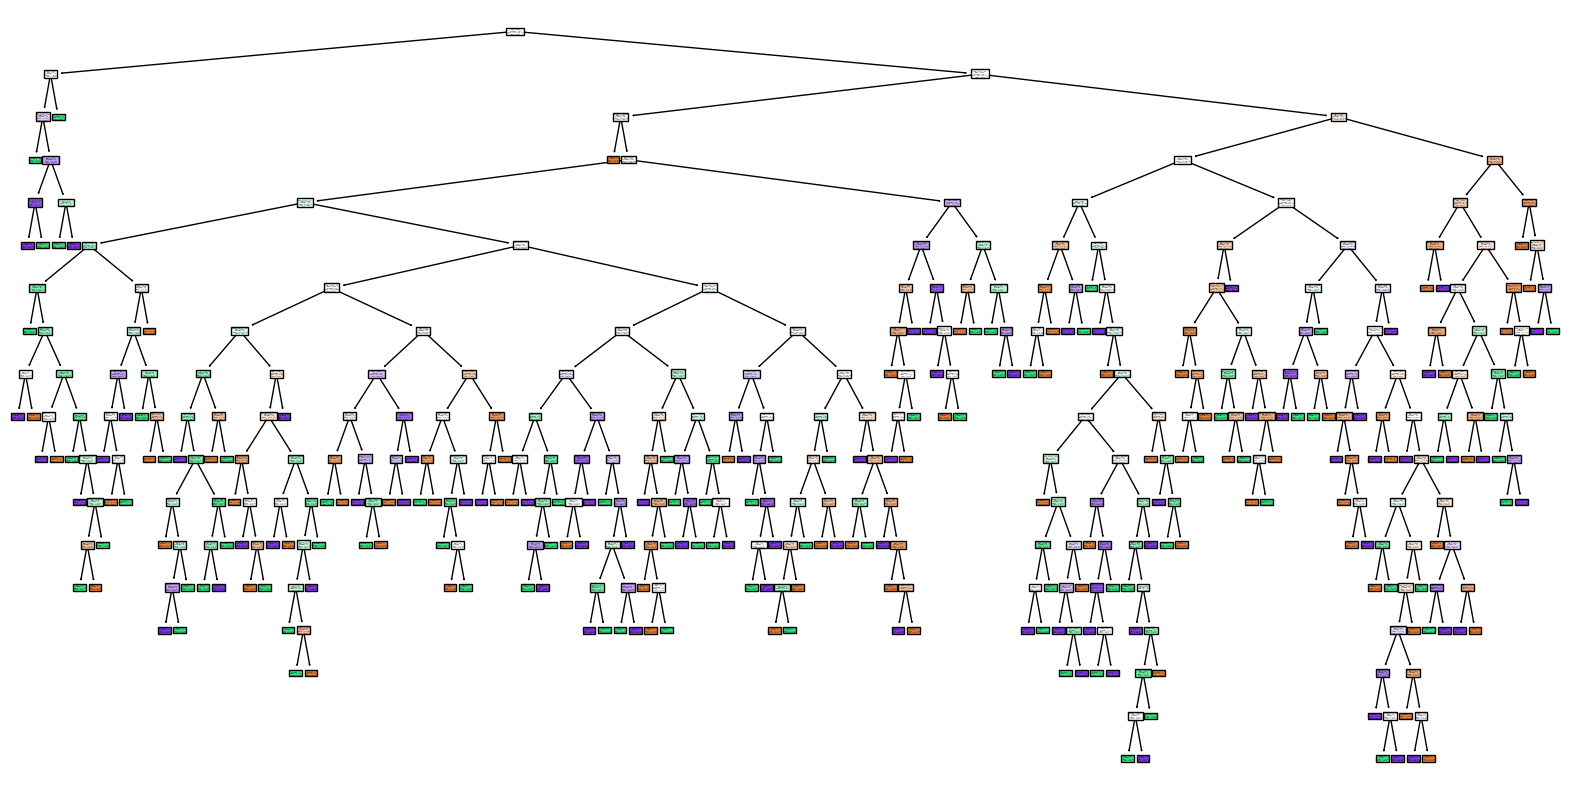

Accuracy (Entropy): 0.31343283582089554


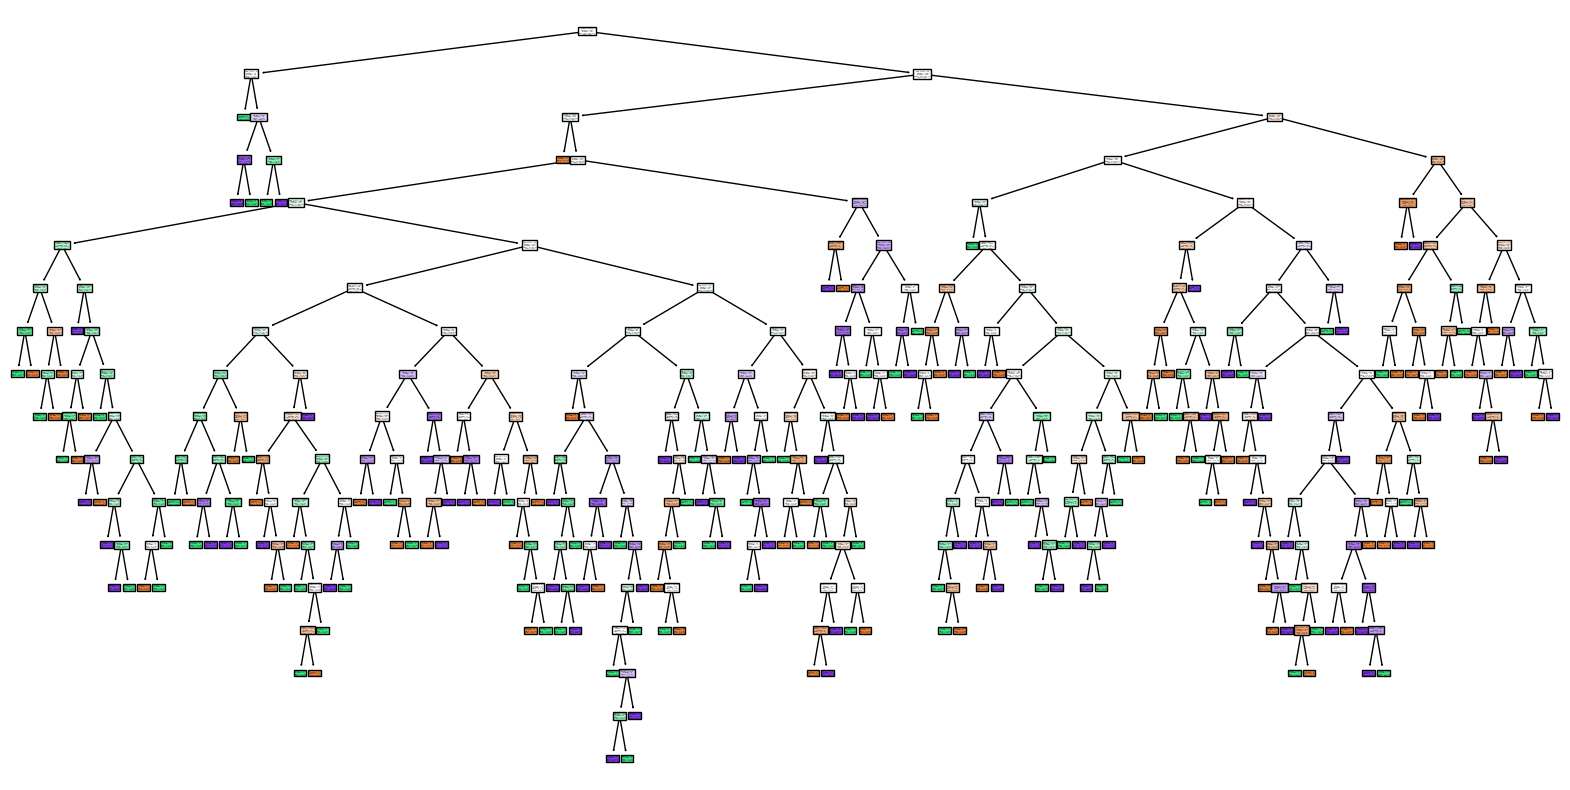

In [13]:
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == "object" else col)


X = df_encoded.drop(columns=["interests"])
y = df_encoded["interests"]

#70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sports','Travel','Lifestyle'])
disp.plot(cmap=plt.cm.Reds)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()


clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(x_train, y_train)


y_pred_entropy = clf_entropy.predict(x_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)


plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['Sports','Travel','Lifestyle'], filled=True)
plt.show()

Partition Size: 0.1, Criterion: entropy, Accuracy: 0.34053156146179403
Partition Size: 0.1, Criterion: gini, Accuracy: 0.33056478405315615
Partition Size: 0.2, Criterion: entropy, Accuracy: 0.32710280373831774
Partition Size: 0.2, Criterion: gini, Accuracy: 0.3401869158878505
Partition Size: 0.3, Criterion: entropy, Accuracy: 0.31837606837606836
Partition Size: 0.3, Criterion: gini, Accuracy: 0.33547008547008544


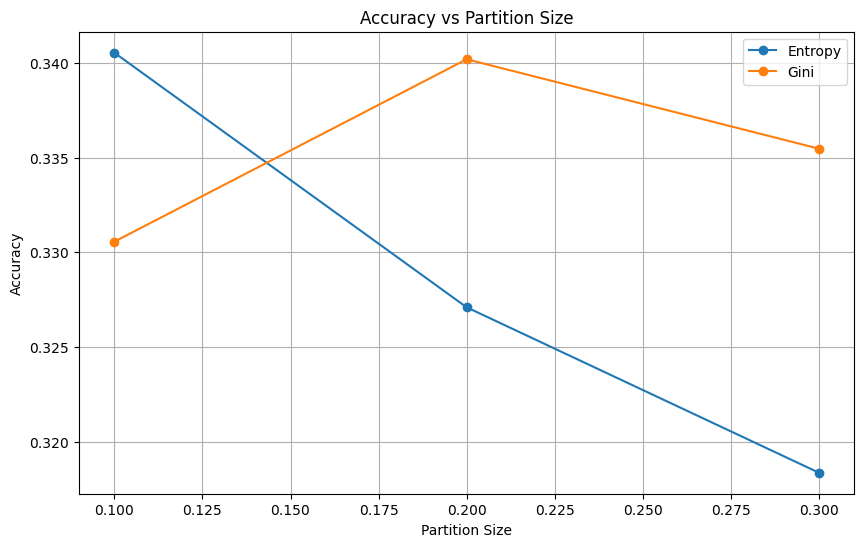

In [14]:
  partition_sizes = [0.1, 0.2, 0.3]

  criterions = ["entropy", "gini"]

  results = {}

  for size in partition_sizes:
      for criterion in criterions:
        
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)

          clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        
          clf.fit(X_train, y_train)
        
          y_pred = clf.predict(X_test)
        
          accuracy = accuracy_score(y_test, y_pred)
        
          results[(size, criterion)] = accuracy

  for (size, criterion), accuracy in results.items():
      print(f"Partition Size: {size}, Criterion: {criterion}, Accuracy: {accuracy}")

  sizes_entropy = [size for size, criterion in results if criterion == "entropy"]
  accuracies_entropy = [results[(size, "entropy")] for size in sizes_entropy]
  sizes_gini = [size for size, criterion in results if criterion == "gini"]
  accuracies_gini = [results[(size, "gini")] for size in sizes_gini]

  plt.figure(figsize=(10, 6))
  plt.plot(sizes_entropy, accuracies_entropy, marker='o', label='Entropy')
  plt.plot(sizes_gini, accuracies_gini, marker='o', label='Gini')
  plt.title('Accuracy vs Partition Size')
  plt.xlabel('Partition Size')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

#The results that were printed indicate the achieved accuracy for each different combination of test ratio and criterion type. Here is an explanation for each row of results:

1. Partition Size: 0.1, Criterion: entropy, Accuracy: 0.34053156146179403
   - This result indicates that when using a test ratio of 0.1 and using the "entropy" criterion, an accuracy of 0.34053156146179403 was achieved.

2. Partition Size: 0.1, Criterion: gini, Accuracy: 0.33056478405315615
   - This result indicates that when using a test ratio of 0.1 and using the "gini" criterion, an accuracy of 0.33056478405315615 was achieved.

3. Partition Size: 0.2, Criterion: entropy, Accuracy: 0.32710280373831774
   - This result indicates that when using a test ratio of 0.2 and using the "entropy" criterion, an accuracy of 0.32710280373831774 was achieved.

4. Partition Size: 0.2, Criterion: gini, Accuracy: 0.3401869158878505
   - This result indicates that when using a test ratio of 0.2 and using the "gini" criterion, an accuracy of 0.3401869158878505 was achieved.

5. Partition Size: 0.3, Criterion: entropy, Accuracy: 0.31837606837606836
   - This result indicates that when using a test ratio of 0.3 and using the "entropy" criterion, an accuracy of 0.31837606837606836 was achieved.

6. Partition Size: 0.3, Criterion: gini, Accuracy: 0.33547008547008544
   - This result indicates that when using a test ratio of 0.3 and using the "gini" criterion, an accuracy of 0.33547008547008544 was achieved.

Overall, it can be observed that the accuracy varies across the different combinations of test ratio and criterion type. These results can be used to choose the most suitable combination for achieving the best performance in data classification based on accuracy.